In [1]:
# data manipulation:
import pandas as pd
import numpy as np

# stats:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import pearsonr
from scipy import stats
import math

# plotting and images:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from IPython.display import Image

---
## About the data:

This chapter explores the issues in taking student performance on standardized tests as a hard measure of the overall quality of the school. 

Many factors can contribute to the performance of the students, one of them being family income. The data in this chapter represents the standardized test scores for schools in Indiana (ISTEP+). We are given the percentage of students that have passed both the Math and ELA tests, as well as the school name, and the percentage of "free" (fully subsidized) school lunches.  

Since we are not given the family income levels for the schools, we use the fraction of free lunches as a proxy for the the overall distribution of incomes.

From the data, we choose Anderson Elementary school who overall pass rate for both subjects was $36\%$. Can this number fairly represent the quality of the school and its teachers? We will use the data and the results to answer the question: **Is Anderson Elementary a bad school?**

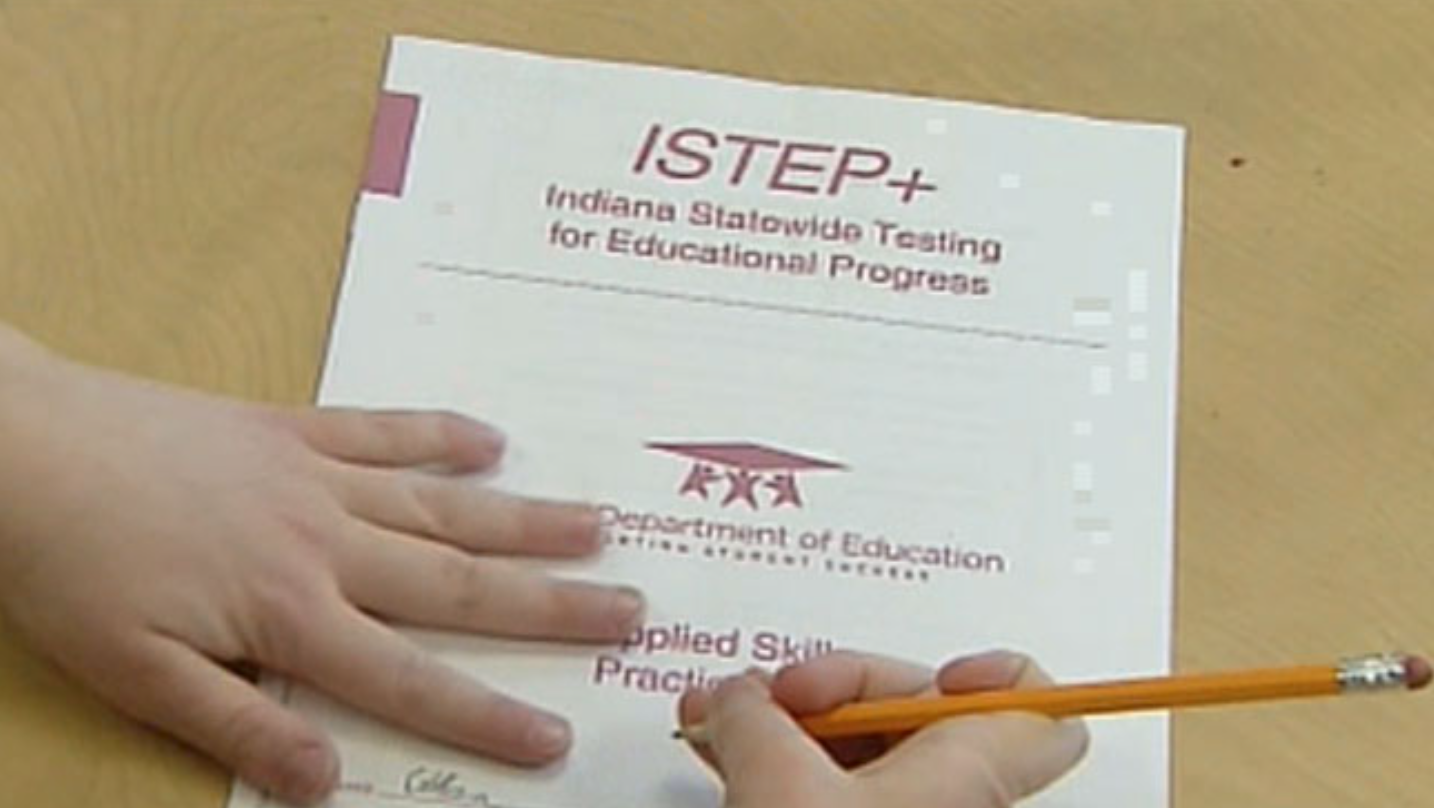

In [144]:
Image(filename='./images/istep.png', width=800)

---
### Import the dataset:

In [2]:
anderson_df = pd.read_excel('ISTEPTestsReg.xlsx', sheet_name='ThisOne', header=3).iloc[:,3:15]
anderson_df = anderson_df.rename(columns = {'Both Math and ELA \nPercent Pass': 'Both Math and ELA Percent Pass', 'free': 'free lunches', 'fraction free': 'fraction free lunches'})
anderson_df

,rank,Corp Name,School ID,School Name,elementary,free lunches,total,fraction free lunches,Both Math and ELA Percent Pass,Predict,Error,Error rank
0,281,Adams Central Community Schools,20,Adams Central Elementary School,Adams Central Elementary School,162,612,0.264706,0.630435,0.681157,-0.050723,572
1,708,North Adams Community Schools,37,Northwest Elementary,Northwest Elementary,225,360,0.625000,0.362903,0.467731,-0.104828,696
2,204,South Adams Schools,25,South Adams Elementary School,South Adams Elementary School,265,619,0.428110,0.670455,0.584362,0.086092,211
3,89,M S D Southwest Allen County Schls,45,Aboite Elementary School,Aboite Elementary School,61,468,0.130342,0.758242,0.760750,-0.002509,429
4,453,M S D Southwest Allen County Schls,46,Whispering Meadow Elementary Sch,Whispering Meadow Elementary Sch,96,485,0.197938,0.534483,0.720709,-0.186226,793
...,...,...,...,...,...,...,...,...,...,...,...,...
844,702,Twin Lakes School Corp,9163,Meadowlawn Elementary School,Meadowlawn Elementary School,303,560,0.541071,0.365854,0.517447,-0.151594,766
845,464,Smith-Green Community Schools,9197,Churubusco Elementary School,Churubusco Elementary School,152,555,0.273874,0.526882,0.675727,-0.148845,762
846,622,Whitley County Con Schools,9178,Little Turtle Elementary School,Little Turtle Elementary School,176,532,0.330827,0.430108,0.641989,-0.211882,814
847,323,Whitley County Con Schools,9186,Northern Heights Elementary School,Northern Heights Elementary School,132,505,0.261386,0.603960,0.683124,-0.079164,638


---
### Plot percentage of passed tests vs. percentage of free lunches:
Below we plot the percentage of free lunches on the x-axis, and the fraction of students that passed both tests on the y-axis. We check for a trend that will confirm the theory that free lunches are a good proxy for family income.

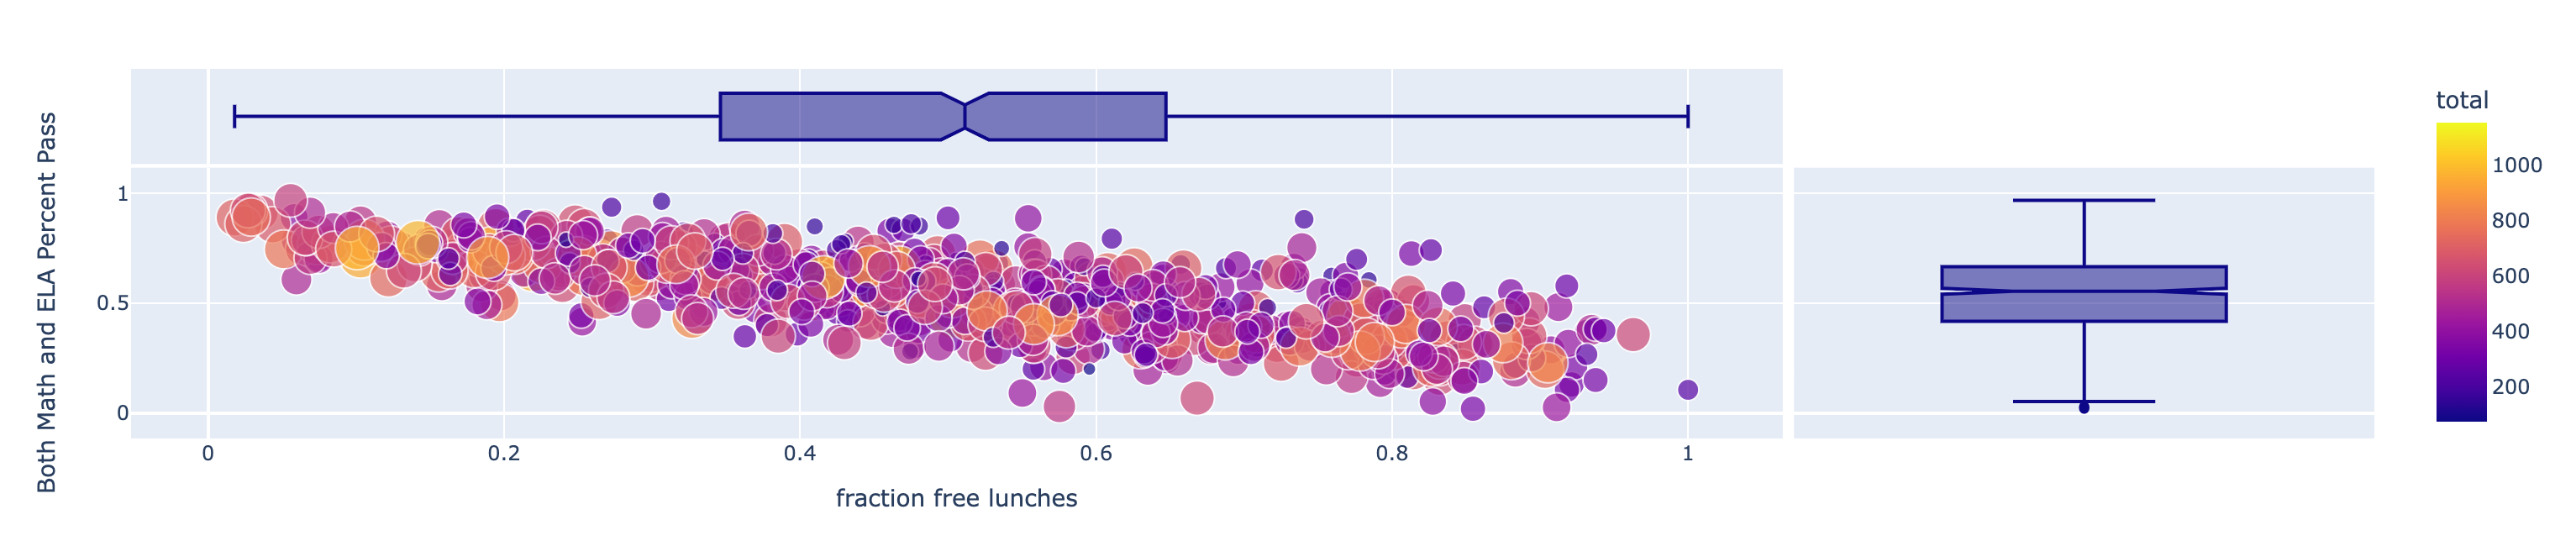

In [136]:
anderson_fig = px.scatter(anderson_df, 
                          x='fraction free lunches', 
                          y='Both Math and ELA Percent Pass', 
                          size='total',
                          color='total',
                          marginal_x='box',
                          marginal_y='box',
                          hover_data=['School Name', 'rank', 'fraction free lunches', 'Both Math and ELA Percent Pass', 'total'])
anderson_fig
Image(filename='./images/scatter.png', width=1500)

As we can see above, there is a clear (downward) trend indicating the correlation between free lunches and performance on standardized tests.

---
### Plot distribution of free lunch percentage, and fraction of math and ELA pass
Below we plot the distribution of both the dependent and independent variable.

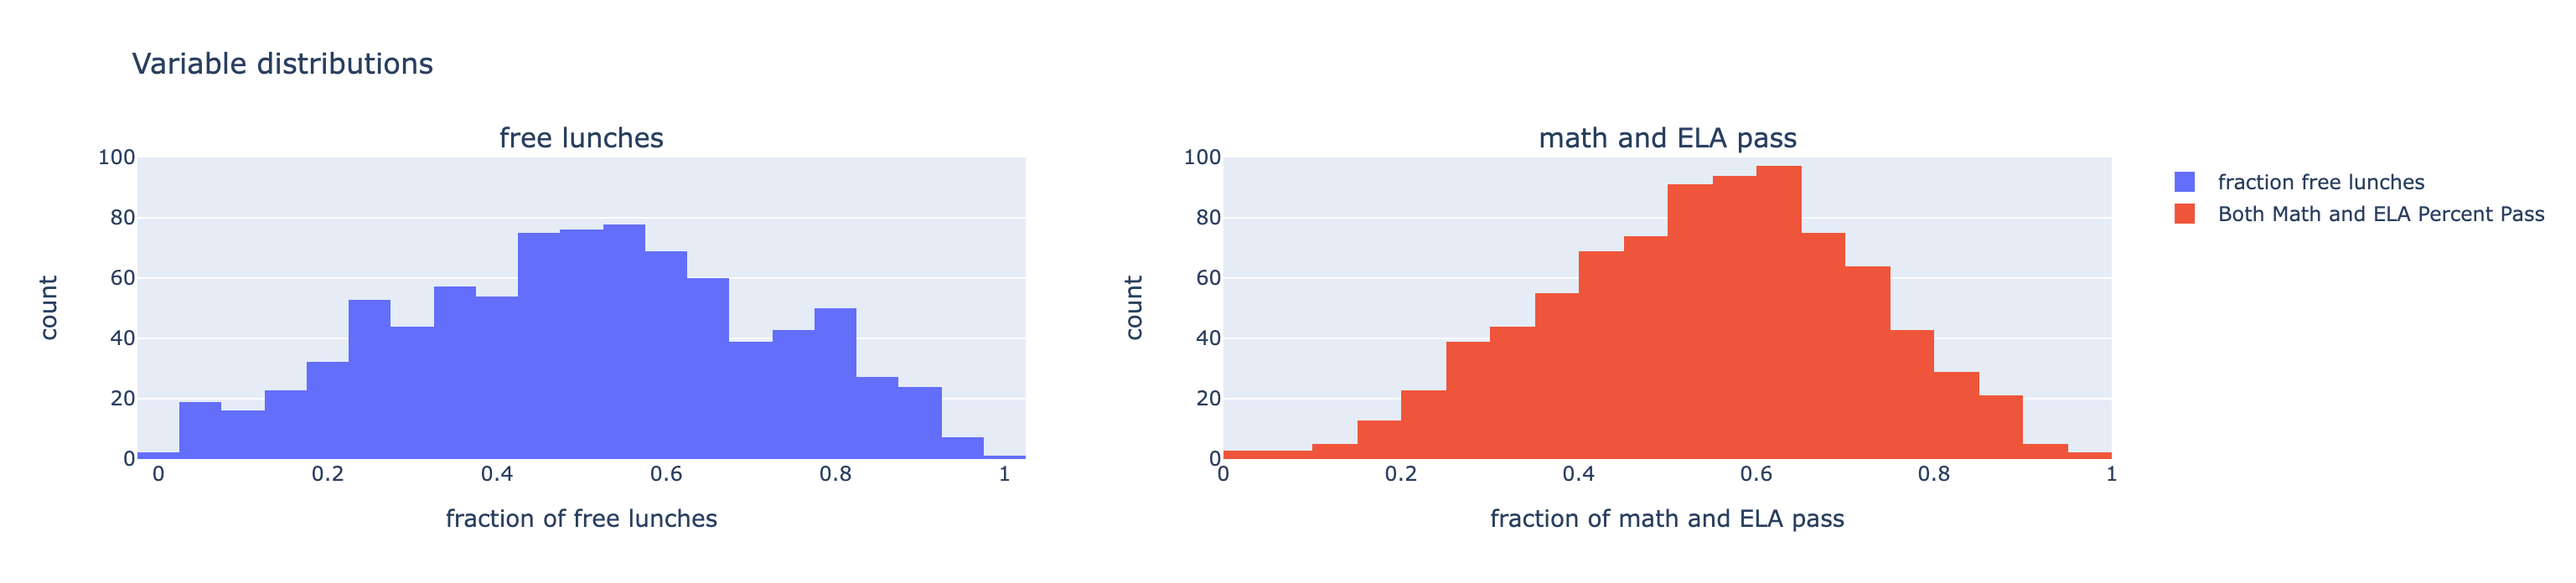

In [138]:
# set subplot fig object:
fig = make_subplots(rows=1, cols=2, subplot_titles=("free lunches", "math and ELA pass"))

# design traces:
free_trace = go.Histogram(x=anderson_df['fraction free lunches'], name='fraction free lunches')
pass_trace = go.Histogram(x=anderson_df['Both Math and ELA Percent Pass'], name='Both Math and ELA Percent Pass')

# append traces to fig and build it:
fig.append_trace(free_trace, row=1, col=1)
fig.append_trace(pass_trace, row=1, col=2)

# Update xaxis properties
fig.update_xaxes(title_text="fraction of free lunches", row=1, col=1)
fig.update_xaxes(title_text="fraction of math and ELA pass", row=1, col=2)

# Update yaxis properties
fig.update_yaxes(title_text="count", range=[0, 100], row=1, col=1)
fig.update_yaxes(title_text="count", range=[0, 100], row=1, col=2)

# title:
fig.update_layout(
    title_text='Variable distributions', # title of plot
)

# display:
fig
Image(filename='./images/dist.png', width=1500)

Both distributions are relatively normal with minimal skew, which is consistent with the literature on distributions of test scores, etc...

---
### Fit an OLS regression line:

In [95]:
# user fraction of free lunches as proxy for family income and predict the rate of passing:
formula = 'Q("Both Math and ELA Percent Pass") ~ Q("fraction free lunches")'
model = smf.ols(formula=formula, data=anderson_df).fit()

# model summary:
print(model.summary2())

                           Results: Ordinary least squares
Model:              OLS                                 Adj. R-squared:     0.514     
Dependent Variable: Q("Both Math and ELA Percent Pass") AIC:                -1146.8619
Date:               2022-03-25 08:54                    BIC:                -1137.3738
No. Observations:   849                                 Log-Likelihood:     575.43    
Df Model:           1                                   F-statistic:        898.5     
Df Residuals:       847                                 Prob (F-statistic): 3.82e-135 
R-squared:          0.515                               Scale:              0.015130  
----------------------------------------------------------------------------------------
                               Coef.    Std.Err.      t       P>|t|     [0.025    0.975]
----------------------------------------------------------------------------------------
Intercept                      0.8380     0.0108    77.5907   0.0

$\text{Both Math and ELA Percent Pass} = 0.8380 -0.5924 *\text{(fraction free lunches)}$

As we can see above, both the intercept and the coefficient for 'fraction free lunches' are statistically significant.

---
### Find and plot residuals and influence:
Below we check the raw and studentized residuals (for goodness of fit), as well as the difference in fits for the presence of feature values with high leverage.

In [89]:
# define function, pass fitted OLS model:
def find_and_plot_residuals(model):
    # get residuals and influence:
    residuals = model.resid

    # outlier influence:
    influence = model.get_influence()
    studentized_residuals = influence.resid_studentized
    influential_values = influence.dffits[0]

    # set subplot fig object:
    fig_res = make_subplots(rows=3, cols=1, subplot_titles=("raw residuals", "studentized residuals", "difference in fits"))

    # design traces:
    res_trace = go.Scatter(y=residuals, name='raw', mode='markers')
    sres_trace = go.Scatter(y=studentized_residuals, name='studentized', mode='markers')
    dfits_trace = go.Scatter(y=influential_values, name='dfits', mode='markers')

    # append traces to fig and build it:
    fig_res.append_trace(res_trace, row=1, col=1)
    fig_res.append_trace(sres_trace, row=2, col=1)
    fig_res.append_trace(dfits_trace, row=3, col=1)

    # Update xaxis properties
    fig_res.update_xaxes(title_text="schools", row=1, col=1)
    fig_res.update_xaxes(title_text="schools", row=2, col=1)
    fig_res.update_xaxes(title_text="schools", row=3, col=1)

    # Update yaxis properties
    fig_res.update_yaxes(title_text="value", row=1, col=1)
    fig_res.update_yaxes(title_text="standard deviations", row=2, col=1)
    fig_res.update_yaxes(title_text="standard deviations", row=3, col=1)

    # title:
    fig_res.update_layout(
        height=800,
        width=1400,
        title_text='Best Fit Residuals', # title of plot
    )

    # display:
    return fig_res

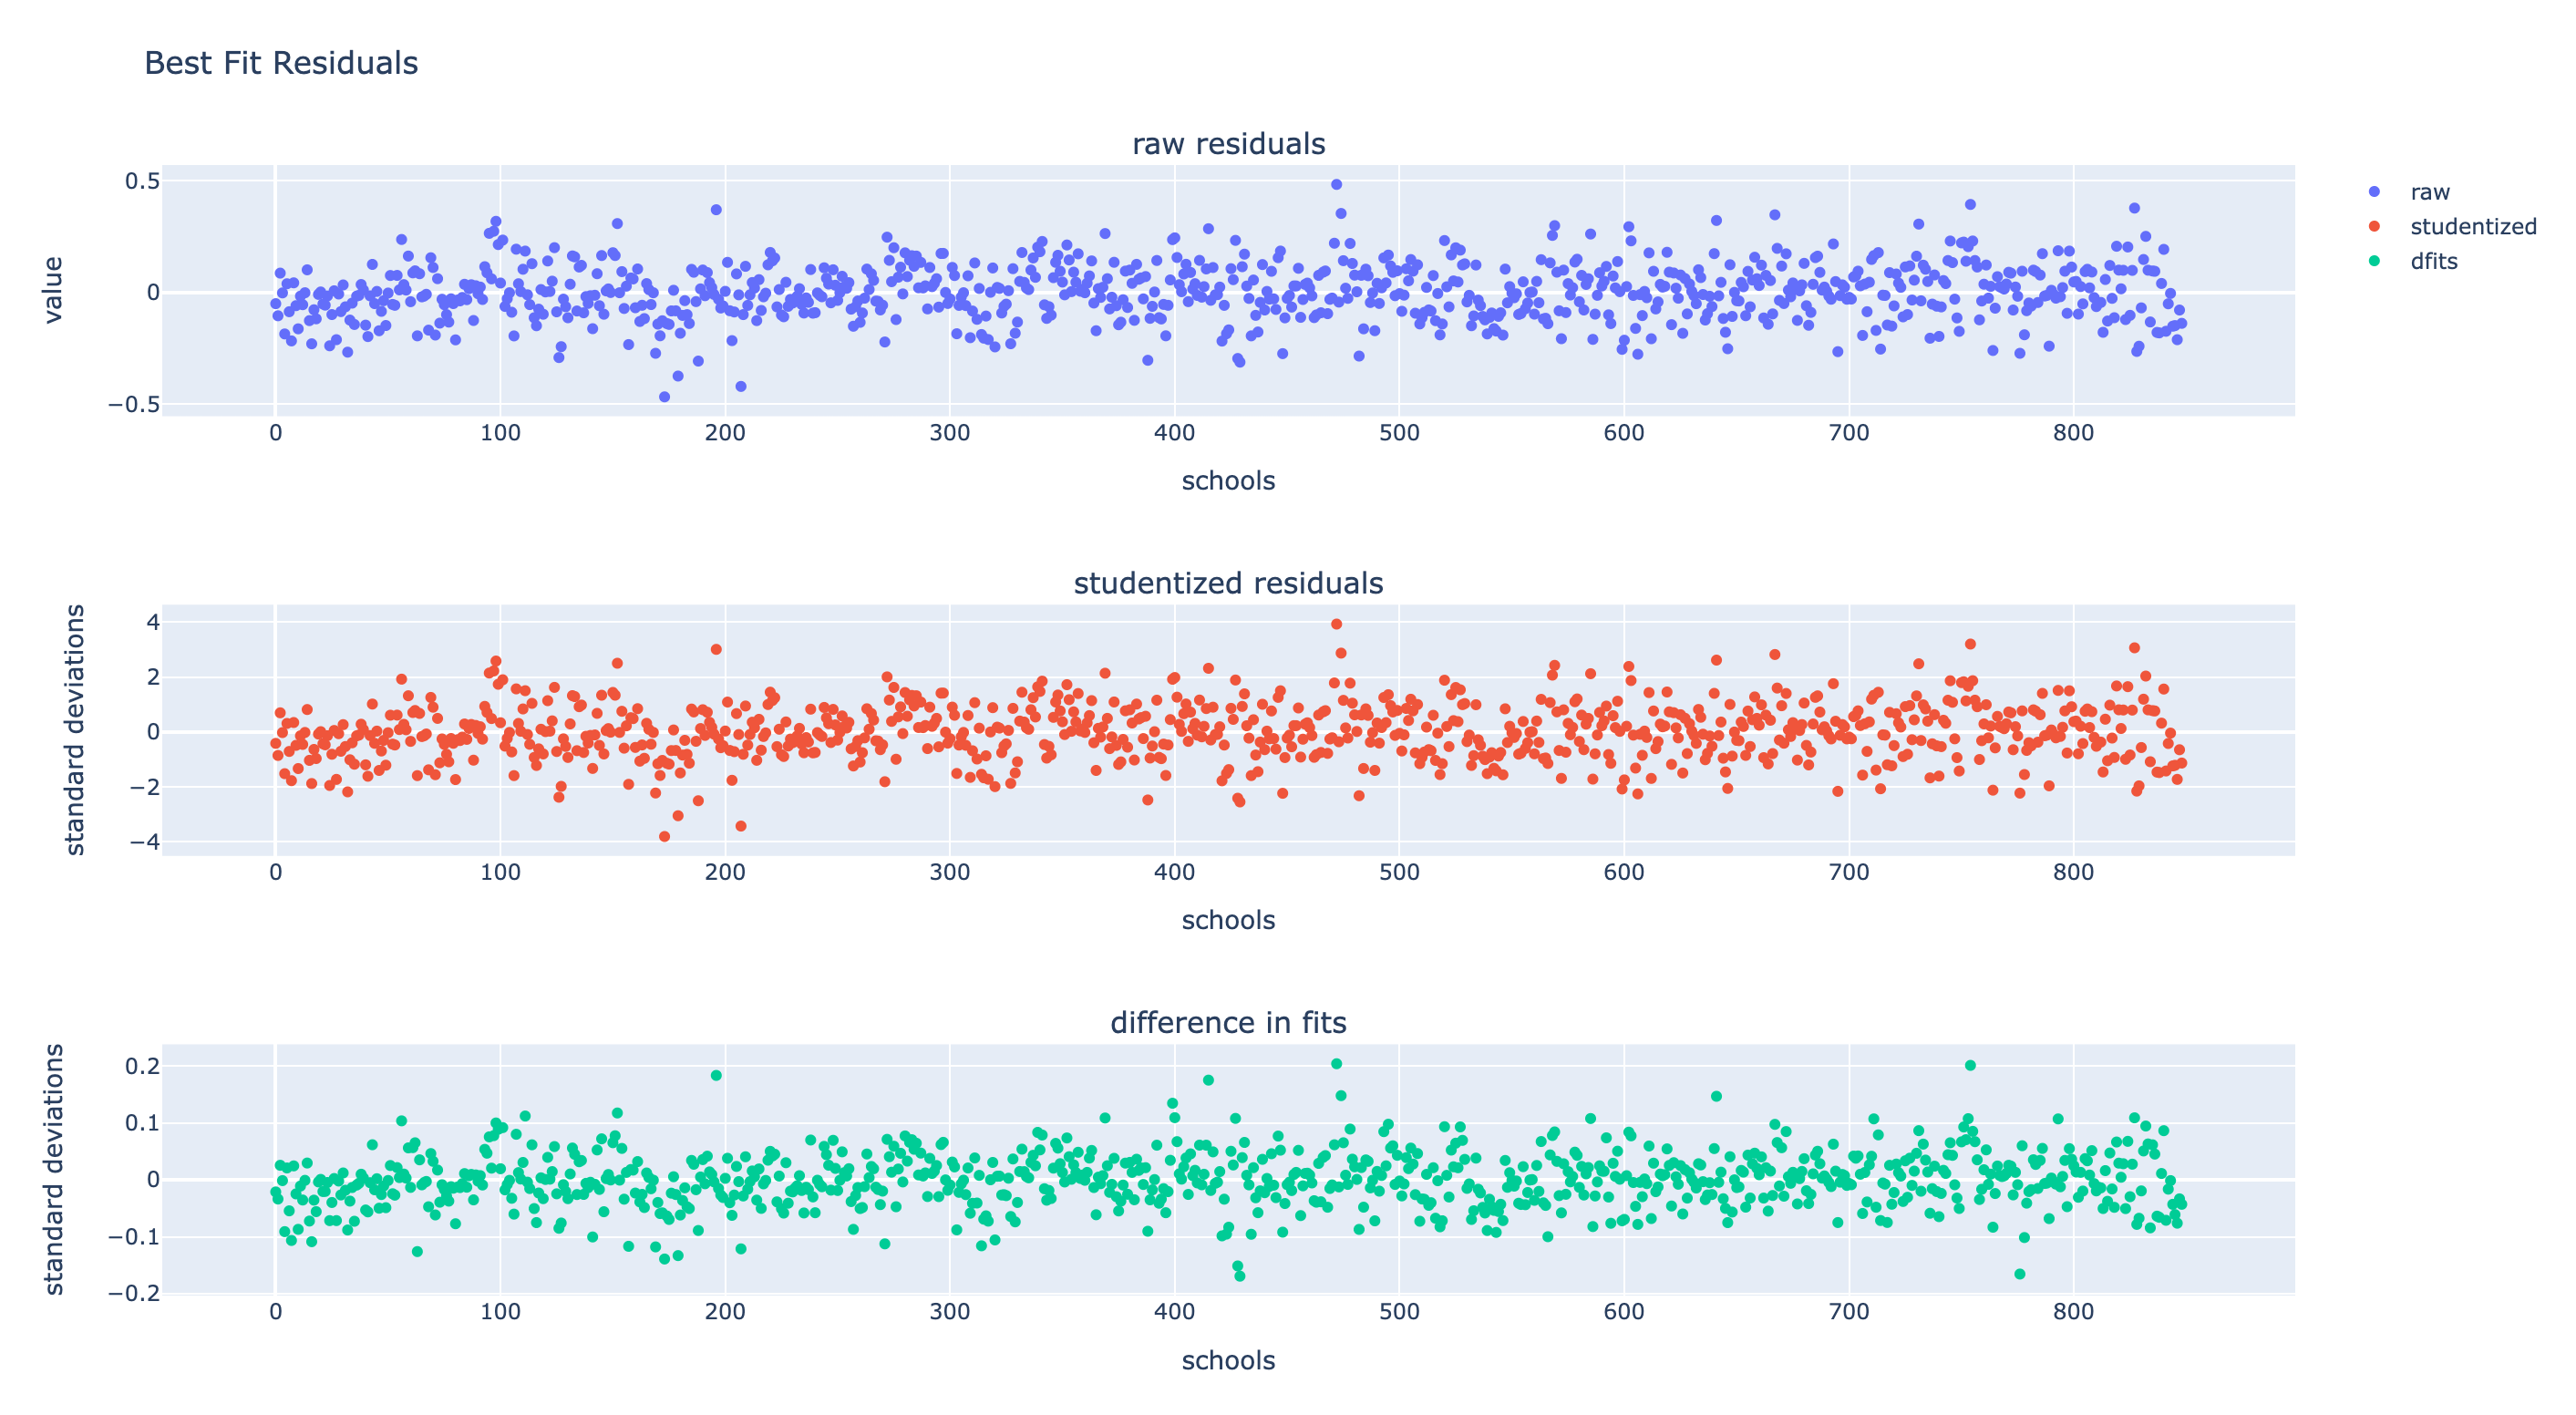

In [140]:
# find them!
find_and_plot_residuals(model)
Image(filename='./images/residuals.png', width=1500)

As we can see above, the raw residuals hover around zero (they actually have a mean of zero, a crucial OLS assumption) and do not display any discernible pattern. The same holds for the studentized residuals. 

The difference in fits plot does not point to any feature values with high leverage.

---
### Predict Anderson Elementary's performance:
Below we employ the fitted model to check Anderson Elementary's performance against the true value and use the result to answer the question of whether or it is a "bad school"

In [108]:
# pull Anderson Elementary values:
anderson_elem = anderson_df[anderson_df['School Name'] == 'Anderson Elementary School'][['School Name', 'fraction free lunches', 'Both Math and ELA Percent Pass']]
anderson_elem

,School Name,fraction free lunches,Both Math and ELA Percent Pass
497,Anderson Elementary School,0.962963,0.357143


As we can see above, Anderson Elementary has over $96\%$ of its students on free lunches. Based on this number, we ought to be able to check the model's prediction against the true pass rate for both tests of $36\%$

In [101]:
anderson_prediction = round(model.predict(anderson_elem['fraction free lunches']), 2)
anderson_prediction

497    0.27
dtype: float64

### Compare Anderson Elementary to its cohort (above $93\%$ of students on fully subsidized lunches:)

In [127]:
# pull similar schools:
similars = anderson_df[anderson_df['fraction free lunches'] > 0.93][['School Name', 'fraction free lunches', 'Both Math and ELA Percent Pass']]
similars['prediction'] = round(model.predict(similars['fraction free lunches']), 3)
similars

,School Name,fraction free lunches,Both Math and ELA Percent Pass,prediction
143,Longfellow Elementary School,0.931548,0.369565,0.286
497,Anderson Elementary School,0.962963,0.357143,0.268
566,Emma Donnan Elementary School,1.000000,0.105263,0.246
777,Delaware Elementary School,0.934783,0.378788,0.284
794,Deming Elementary School,0.931559,0.266667,0.286
833,Fairview Elementary School,0.937294,0.381818,0.283
834,Starr Elementary School,0.937500,0.150000,0.283
835,Vaile Elementary School,0.943038,0.375000,0.279


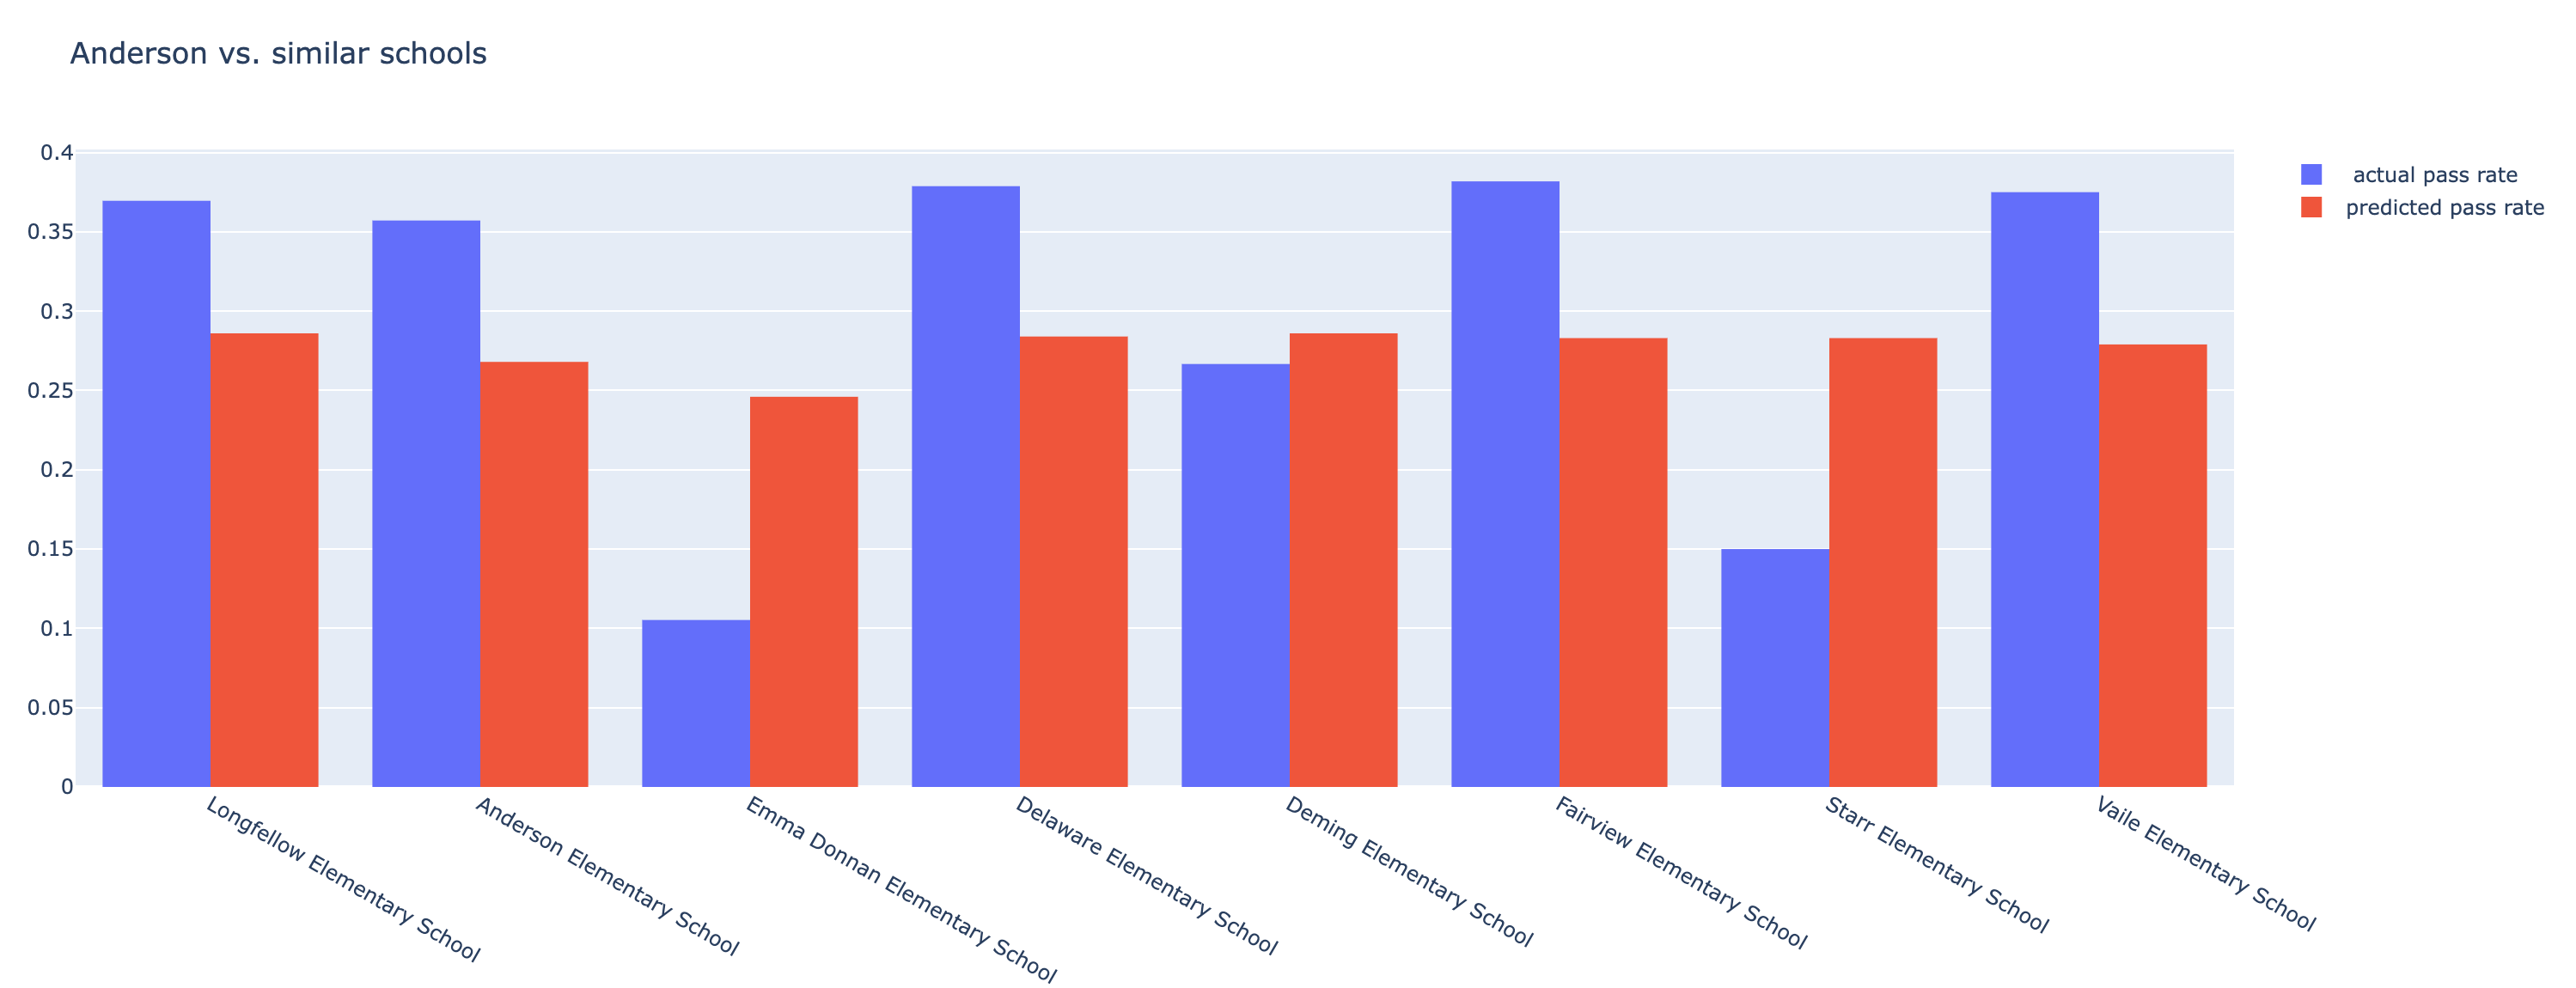

In [141]:
# plot similar schools:
similars_fig = go.Figure()
similars_fig.add_trace(go.Histogram(histfunc="sum", y=similars['Both Math and ELA Percent Pass'], x=similars['School Name'], name=" actual pass rate"))
similars_fig.add_trace(go.Histogram(histfunc="sum", y=similars['prediction'], x=similars['School Name'], name="predicted pass rate"))
similars_fig.update_layout(title_text="Anderson vs. similar schools", height=600)

similars_fig
Image(filename='./images/similars.png', width=1500)

---
### Conclusion
As the output of the model above shows, Anderson Elementary's passing rate ought to be $27\%$, whereas is is actually $36\%$. Therefore, Anderson's pass rate is $9\%$ above the predicted value based on the fraction of students on fully subsidized lunches. Furthermore, when compared to other schools with similar percentages of free lunches, we can see that out of the eight schools in this cohort Anderson is one of the five outperforms the prediction.

We cannot rightfully conclude that Anderson is a "bad school" given its performance. 

---